In [248]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import random, scipy
from ifitpy import Fitter
from ifitpy import Functions
from ifitpy import Utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [249]:
f = Fitter("linear") #linear, expo, gaussian, gaussian2d, poly

# This fit package permits to, well, fit a given x,y data. It encapsulates both iminuit and curve_fit. 
# There are two type of functions. Simple (linear, expo) and Complex(gaussian, gaussian2d, poly).

# For Simple function fit(x,y) are fit(x,y,p0) are valid inputs. 
# In the first option the fit attempts to estimate the initial starting point 
# In the second option a list of parameters (p0) is used to innitilized the fit

# For Complex functions fit(x,y, n) are fit(x,y,p0) are valid inputs. 
# If n us used then the algorithm will use this value to generate the fitting function with n components
# For example, fit(xx,yy,n=3) will fit a sum of two gaussian(2d) or a 3-degree polinom. And p0 zero is also estimated.
# If fit(x,y,n,p0) p0 will be the innitialization parameters. Note that len(p0) = n*parameters_to_fit.

#There's also a f.fitBinned(xx,yy,bins=50) option which allows to fit a profile histogram instead of the raw data.
#This option is often faster and the recomended one as it takes into account the statistical fluctuation of the data.

#To extract the fit results use

f.fit([0,10], [0,-10])
p = f.getParams()
print(p) # prints a string with the available variables.
print(p.vars) # list of the results
print(p.m) # slope for the "linear" type
print(p.b) # slope for the "intercept" type

#Use f.evaluate(xx) to evaluate the function, like for plotting and such
print(f.evaluate([20]))

vars: [-1.0, 0.0], m: -1.0, b: 0.0
[-1.0, 0.0]
-1.0
0.0
[-20.]


/home/guilherme/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


<IPython.core.display.Javascript object>


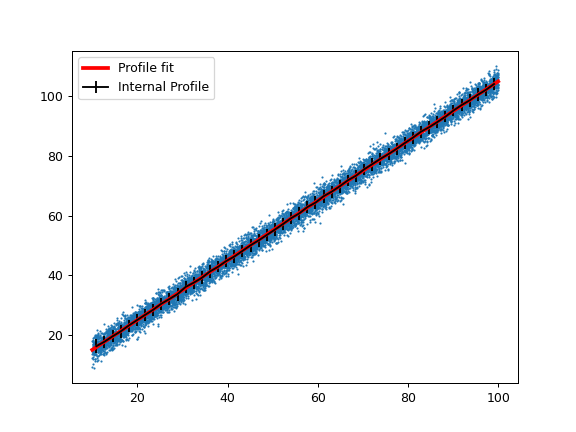


0.9999247221397226 5.010851781641539
Chi2 =  0.0

1.000096980016059 4.999921425935179
Chi2 =  0.0


In [3]:
m, b = 1,0
xx = np.arange(10,100,0.01)
yy = xx*m+b + np.random.normal(5, 2, size = xx.shape)


fig = plt.figure()
plt.scatter(xx, yy,s=0.5)

f = Fitter("linear")
f.fit(xx,yy)
p = f.getParams()
print(p.m,p.b)
print("Chi2 = ",f.chi2/f.dof)

plt.plot(xx, xx*p.m+p.b, c="orange")


f = Fitter("linear")
f.fitBinned(xx,yy,bins=50)
p = f.getParams()
print(p.m,p.b)
print("Chi2 = ",f.chi2/f.dof)

plt.errorbar(f.profx, f.profy, yerr=f.profyrr, c="black", label="Internal Profile")
plt.plot(xx,f.evaluate(xx), c="red", label="Profile fit", lw=3)
plt.legend()

<IPython.core.display.Javascript object>


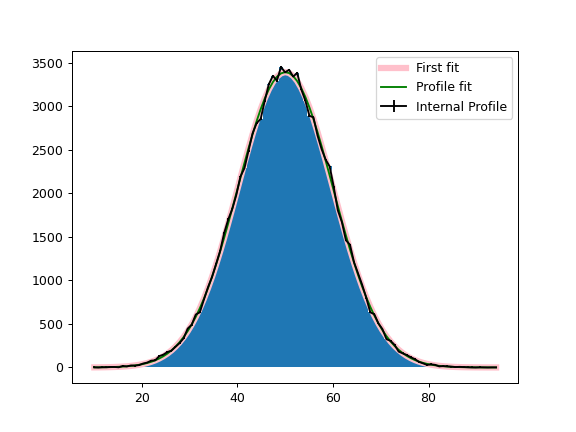

potencial_means:  [12.61032885 49.21600259 50.70456901 92.37293593]
yy_roots_values:  [3.60087681e+00 3.37967034e+03 3.39615761e+03 1.00168213e+00]
Chi2 =  0.0
[3390.9020819100847, 50.024491157262005, 9.987186499597172]
potencial_means:  [12.61032885 49.21600259 50.70456901 92.37293593]
yy_roots_values:  [3.60087681e+00 3.37967034e+03 3.39615761e+03 1.00168213e+00]
2: Chi2 =  0.0
vars: [3390.01813333317, 50.02186502490384, 9.988312418948178], amp: 3390.01813333317, mean: 50.02186502490384, sigma: 9.988312418948178
Mean is:  50.02186502490384
Sigma is:  9.988312418948178
Amplitude is:  3390.01813333317
[3390.01813333317, 50.02186502490384, 9.988312418948178]


In [170]:
mu, sig = 50,10
yyt = np.random.normal(mu, sig, size = 100000)

fig = plt.figure()
res = plt.hist(yyt, bins=100)

yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5

f = Fitter("gaussian")
f.fit(xx, yy)
plt.plot(xx,f.evaluate(xx), c="pink", label="First fit", lw=5)

p = f.getParams()
print("Chi2 = ",f.chi2/f.dof)
print(p.vars)


f = Fitter("gaussian")
f.fitBinned(yyt,bins=100)
p = f.getParams()
print("2: Chi2 = ",f.chi2/f.dof)
print(p)
print("Mean is: ", p.mean)
print("Sigma is: ", p.sigma)
print("Amplitude is: ", p.amp)
print(p.vars)

plt.errorbar(f.profx, f.profy, yerr=f.profyrr, c="black", label="Internal Profile")
plt.plot(xx,f.evaluate(xx), c="green", label="Profile fit")

plt.legend()

<IPython.core.display.Javascript object>


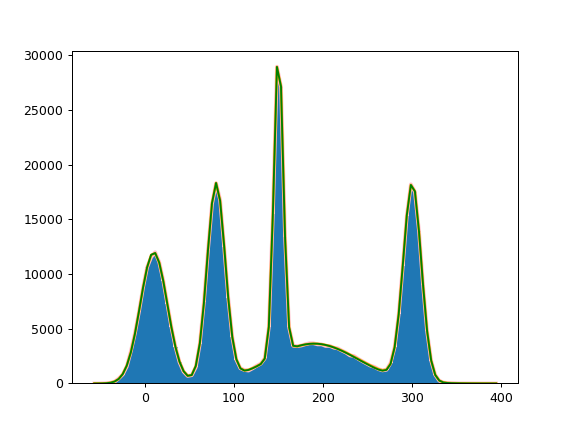

<ValueView x0=11970.56423447437 x1=10.050375667761944 x2=15.185802767421997 x3=18006.77827792054 x4=79.96486025753674 x5=10.087694336295327 x6=28054.50000020106 x7=149.9986884496471 x8=5.172944661179406 x9=3636.0154082382182 x10=190.12473051541303 x11=50.0286776415606 x12=18028.9147731482 x13=299.9941657687696 x14=10.06580005150701>
vars: [11970.56423447437, 10.050375667761944, 15.185802767421997, 18006.77827792054, 79.96486025753674, 10.087694336295327, 28054.50000020106, 149.9986884496471, 5.172944661179406, 3636.0154082382182, 190.12473051541303, 50.0286776415606, 18028.9147731482, 299.9941657687696, 10.06580005150701], amp_0: 11970.56423447437, mean_0: 10.050375667761944, sigma_0: 15.185802767421997, amp_1: 18006.77827792054, mean_1: 79.96486025753674, sigma_1: 10.087694336295327, amp_2: 28054.50000020106, mean_2: 149.9986884496471, sigma_2: 5.172944661179406, amp_3: 3636.0154082382182, mean_3: 190.12473051541303, sigma_3: 50.0286776415606, amp_4: 18028.9147731482, mean_4: 299.9941

In [250]:
from scipy.interpolate import UnivariateSpline


mu, sig = 20,10
m2 = np.array(np.random.normal(10, 15, size = 100000))
m1 = np.array(np.random.normal(80, 10, size = 100000))
m3 = np.array(np.random.normal(300, 10, size = 100000))
m4 = np.array(np.random.normal(190, 50, size = 100000))
m5 = np.array(np.random.normal(150, 5, size = 80000))

yyt = np.concatenate((m2, m1,m3,m4, m5))
fig = plt.figure()

res = plt.hist(yyt, bins=100)
yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5
plt.plot(xx,yy,c="pink",lw=3)


gauss_to_find = 5
f = Fitter("gaussian")
f.fit(xx,yy,n=gauss_to_find)
p = f.getParams()
print(f.par)
print(p)
plt.plot(xx,f.evaluate(xx), c="orange", lw=2, label="unbinned")

#fit finned
f = Fitter("gaussian")
f.fitBinned(yyt,bins=100,n=gauss_to_find)
p = f.getParams()
print("Chi2 = ",f.chi2/f.dof)
print(p)


plt.plot(xx,f.evaluate(xx), c="green", label="binned")

<IPython.core.display.Javascript object>


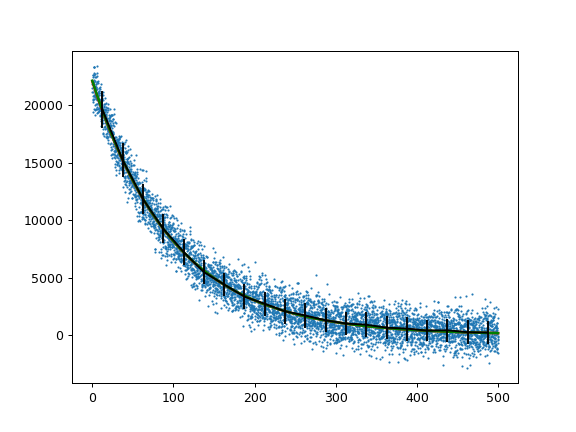

<ValueView p0=10.003529178214809 p1=-0.00998766341155932>
vars: [10.003529178214809, -0.00998766341155932], p0: 10.003529178214809, p1: -0.00998766341155932
vars: [10.006073006862891, -0.009989472914982821], p0: 10.006073006862891, p1: -0.009989472914982821


<ErrorbarContainer object of 3 artists>

In [251]:
p0, p1 = 10, -0.01
xx = np.arange(0,500,0.1)
yy = np.exp(p0+p1*xx) +np.random.normal(50, 1000, size = xx.shape)

fig = plt.figure()
plt.scatter(xx, yy,s=0.5)


f = Fitter("expo")
f.fit(xx,yy)
p = f.getParams()
print(f.par)
print(p)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)



f = Fitter("expo")
f.fitBinned(xx,yy,bins=20)
p = f.getParams()
print(p)
plt.plot(xx, f.evaluate(xx),color="g",lw=2)
plt.errorbar(f.profx, f.profy, yerr=f.profyrr, c="black", label="Internal Profile")

/tmp/ipykernel_261/1842171329.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  pts = numpy_2d([0, 0], cov, size=10000)


<IPython.core.display.Javascript object>


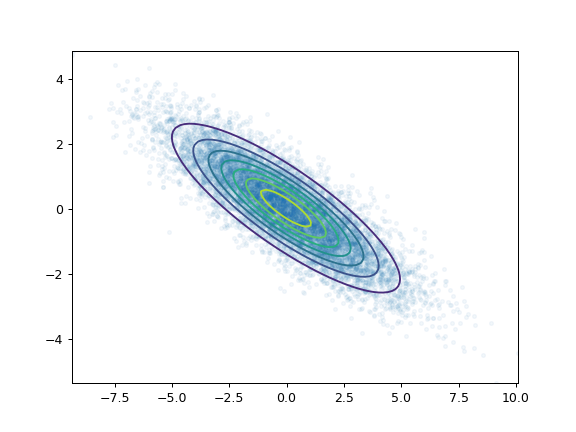

<ValueView x0=-0.02695942839521748 x1=0.02144058181804366 x2=2.7011729282649846 x3=0.6331327507117013 x4=1.1607602607663623 x5=0.4408903316743698>
vars: [-0.02695942839521748, 0.02144058181804366, 2.7011729282649846, 0.6331327507117013, 1.1607602607663623, 0.4408903316743698], x0_0: -0.02695942839521748, y0_0: 0.02144058181804366, sigma_x_0: 2.7011729282649846, sigma_y_0: 0.6331327507117013, amp_0: 1.1607602607663623, theta_0: 0.4408903316743698


In [254]:
numpy_2d = np.random.multivariate_normal
f = Fitter("gaussian2d")

cov = np.array([[6, -3], [-3, 1]])  # to generate our testing dataset
pts = numpy_2d([0, 0], cov, size=10000)
x,y = pts[:, 0], pts[:, 1]

fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.05)


f.fit(x,y)
p = f.getParams()
print(f.par)
print(p)


xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)))

<ValueView x0=0.10168572973192846 x1=-0.050471930851215485 x2=2.9107262526316875 x3=1.2481320114925425 x4=1.8225829507597242 x5=0.589943700867036 x6=3.9952972360903676 x7=4.17938648641355 x8=2.2203982683019965 x9=3.8601852234823695 x10=0.7208840605983559 x11=-0.3369685667838548>
vars: [0.10168572973192846, -0.050471930851215485, 2.9107262526316875, 1.2481320114925425, 1.8225829507597242, 0.589943700867036, 3.9952972360903676, 4.17938648641355, 2.2203982683019965, 3.8601852234823695, 0.7208840605983559, -0.3369685667838548], x0_0: 0.10168572973192846, y0_0: -0.050471930851215485, sigma_x_0: 2.9107262526316875, sigma_y_0: 1.2481320114925425, amp_0: 1.8225829507597242, theta_0: 0.589943700867036, x0_1: 3.9952972360903676, y0_1: 4.17938648641355, sigma_x_1: 2.2203982683019965, sigma_y_1: 3.8601852234823695, amp_1: 0.7208840605983559, theta_1: -0.3369685667838548


<IPython.core.display.Javascript object>


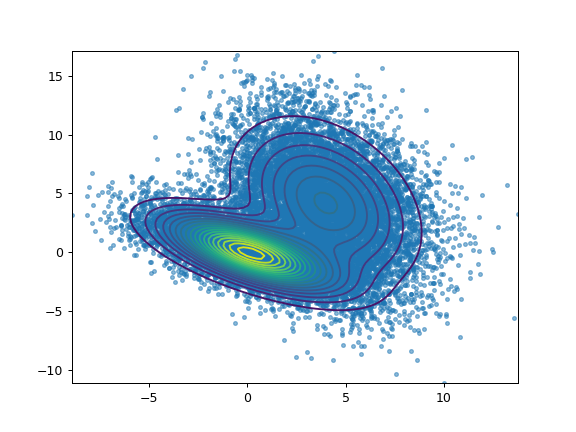

In [255]:
f = Fitter("gaussian2d")

numpy_2d = np.random.multivariate_normal  # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
cov1 = np.array([[6, -3], [-3, 15]])

pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([4, 4], cov1, size=10000)))
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y,n=2)
p = f.getParams()
print(f.par)
print(p)
#print(p.sigma_y_1)

fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)


xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)), levels=20)

<ValueView x0=0.013388116373993529 x1=-0.0027664631110789185 x2=1.2276836970314222 x3=2.784774739968573 x4=1.8831319087180824 x5=2.152522201834511 x6=2.0263185685994793 x7=4.969848260127567 x8=2.8706698156653787 x9=1.2074892054368178 x10=1.8783034842424788 x11=0.5911355463278604 x12=15.036615326427187 x13=4.9701874658589675 x14=1.2392613528330767 x15=2.8272164273912805 x16=1.8598526917646194 x17=2.1643127884923383>
vars: [0.013388116373993529, -0.0027664631110789185, 1.2276836970314222, 2.784774739968573, 1.8831319087180824, 2.152522201834511, 2.0263185685994793, 4.969848260127567, 2.8706698156653787, 1.2074892054368178, 1.8783034842424788, 0.5911355463278604, 15.036615326427187, 4.9701874658589675, 1.2392613528330767, 2.8272164273912805, 1.8598526917646194, 2.1643127884923383], x0_0: 0.013388116373993529, y0_0: -0.0027664631110789185, sigma_x_0: 1.2276836970314222, sigma_y_0: 2.784774739968573, amp_0: 1.8831319087180824, theta_0: 2.152522201834511, x0_1: 2.0263185685994793, y0_1: 4.96

<IPython.core.display.Javascript object>


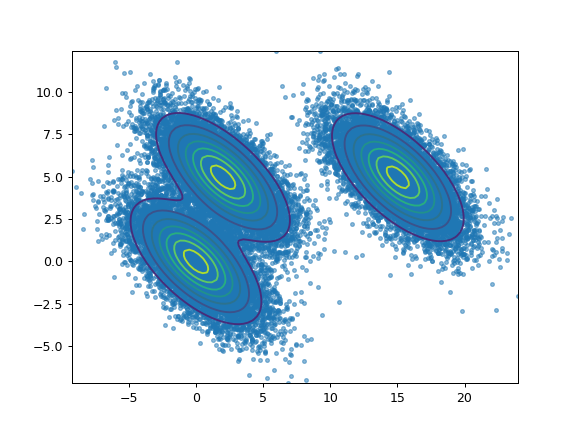

In [258]:
f = Fitter("gaussian2d")

numpy_2d = np.random.multivariate_normal # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([2, 5], cov, size=10000)
                      ,numpy_2d([15, 5], cov, size=10000)))
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y,n=3)
p = f.getParams()
print(f.par)
print(p)
print(p.sigma_x_2)
fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)

xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)))

(5000,)
<ValueView x0=9.843858812747072 x1=6.027690163301097 x2=-9.615059845713139>
vars: [9.843858812747072, 6.027690163301097, -9.615059845713139], a: 9.843858812747072, b: 6.027690163301097, c: -9.615059845713139
9.843858812747072


<IPython.core.display.Javascript object>


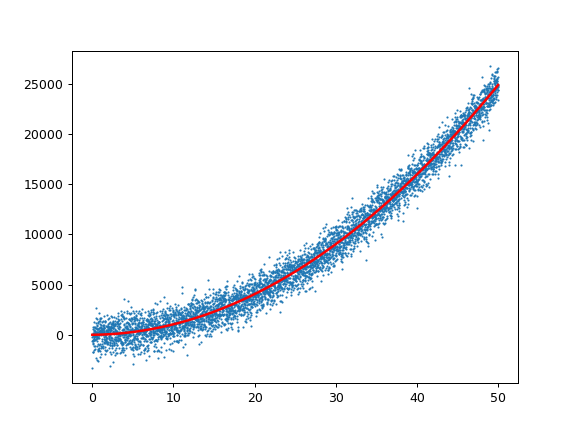

In [259]:
f = Fitter("poly")

p0, p1, p2 = 10, -0.01,3
xx = np.arange(0,50,0.01)

print(xx.shape)
yy = p0*xx**2+p1*xx+p2+np.random.normal(10, 1000, size = xx.shape)

f.fit(xx,yy,p0=3)
p = f.getParams()
print(f.par)
print(p)
print(p.a)

fig2 = plt.figure()

plt.scatter(xx, yy,s=0.5)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)

(10000,)
<ValueView x0=-1.9606062542223257 x1=1.0319473681084779 x2=-41.13585342159844 x3=764.2061044969312>
vars: [-1.9606062542223257, 1.0319473681084779, -41.13585342159844, 764.2061044969312], a: -1.9606062542223257, b: 1.0319473681084779, c: -41.13585342159844, d: 764.2061044969312
-1.9606062542223257


<IPython.core.display.Javascript object>


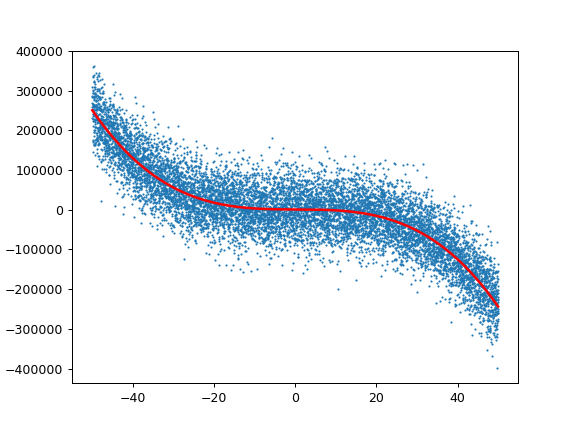

In [260]:
f = Fitter("poly")

p0, p1, p2,p3 = 2, -1,-1,-2
xx = np.arange(-50,50,0.01)

print(xx.shape)
yy = p3*xx**3+p0*xx**2+p1*xx+p2+np.random.normal(100, 50000, size = xx.shape)

f.fit(xx,yy,p0=4)
p = f.getParams()
print(f.par)
print(p)
print(p.a)

fig2 = plt.figure()

plt.scatter(xx, yy,s=0.5)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)